# `torch.nn`: Easy neural-network construction

Convention: the first index is the data-item index, so N images each of shape 128 x 128 will be in a tensor of shape N x 128 x 128

## References

* C. F. Higham and D. J. Higham (2018) Deep Learning: An Introduction for Applied Mathematicians, https://arxiv.org/abs/1801.05894
* J. Berner, P. Grohs, G. Kutyniok, P. Petersen (2021) The Modern Mathematics of Deep Learning, https://arxiv.org/abs/2105.04026

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Define a nonlinear function f(x) that we want to approximate

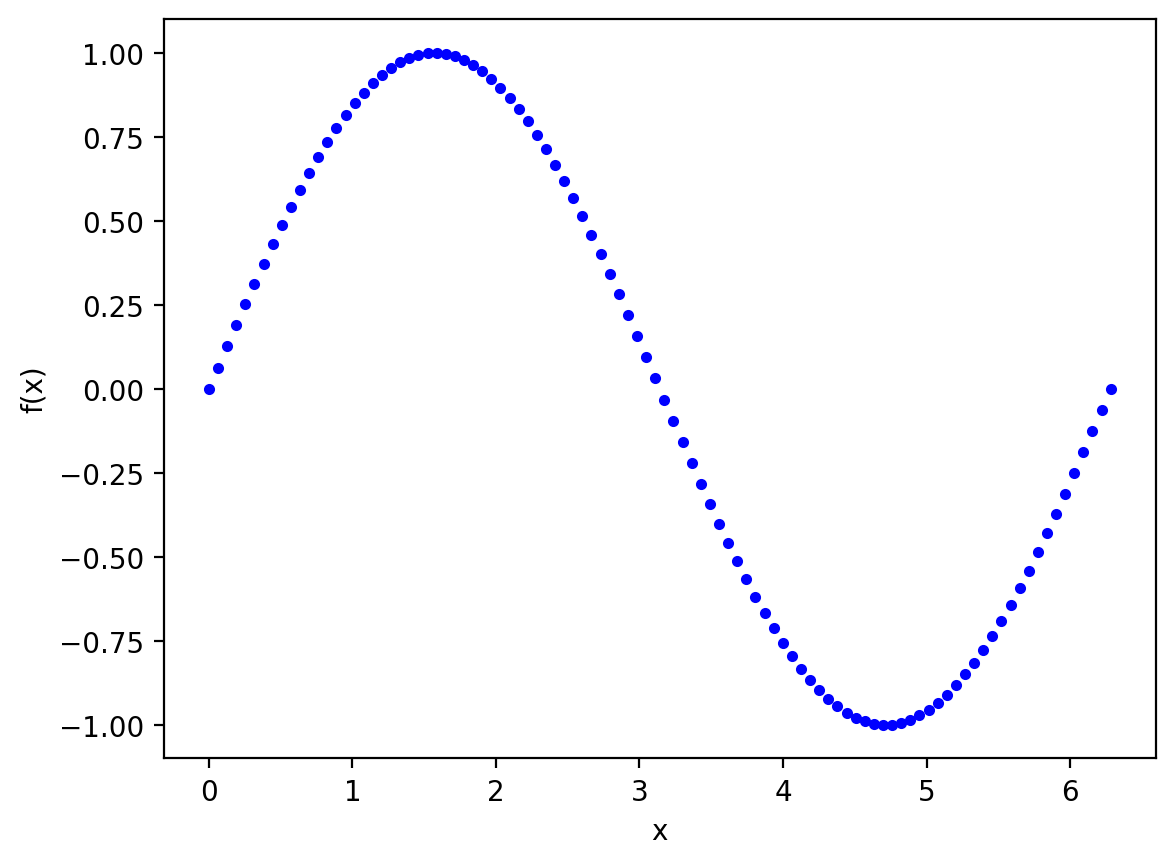

In [2]:
x = torch.linspace(0, 2*np.pi, 100)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy(), 'b.')
plt.xlabel('x')
plt.ylabel('f(x)');

## Create a basic fully-connected neural network with ReLU layers

In [3]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = torch.nn.Linear(1, 8)
        self.fc2 = torch.nn.Linear(8, 8)
        self.fc3 = torch.nn.Linear(8, 1)

    def forward(self, x):
        y1 = torch.nn.functional.relu(self.fc1(x))
        y2 = torch.nn.functional.relu(self.fc2(y1))
        y3 = self.fc3(y2)
        return y3

In [4]:
model = MyModel()

## What does this model predict?

We'll plot the training data as blue dots and the model as a red line.

In [5]:
yp = model(x.reshape(100,1))

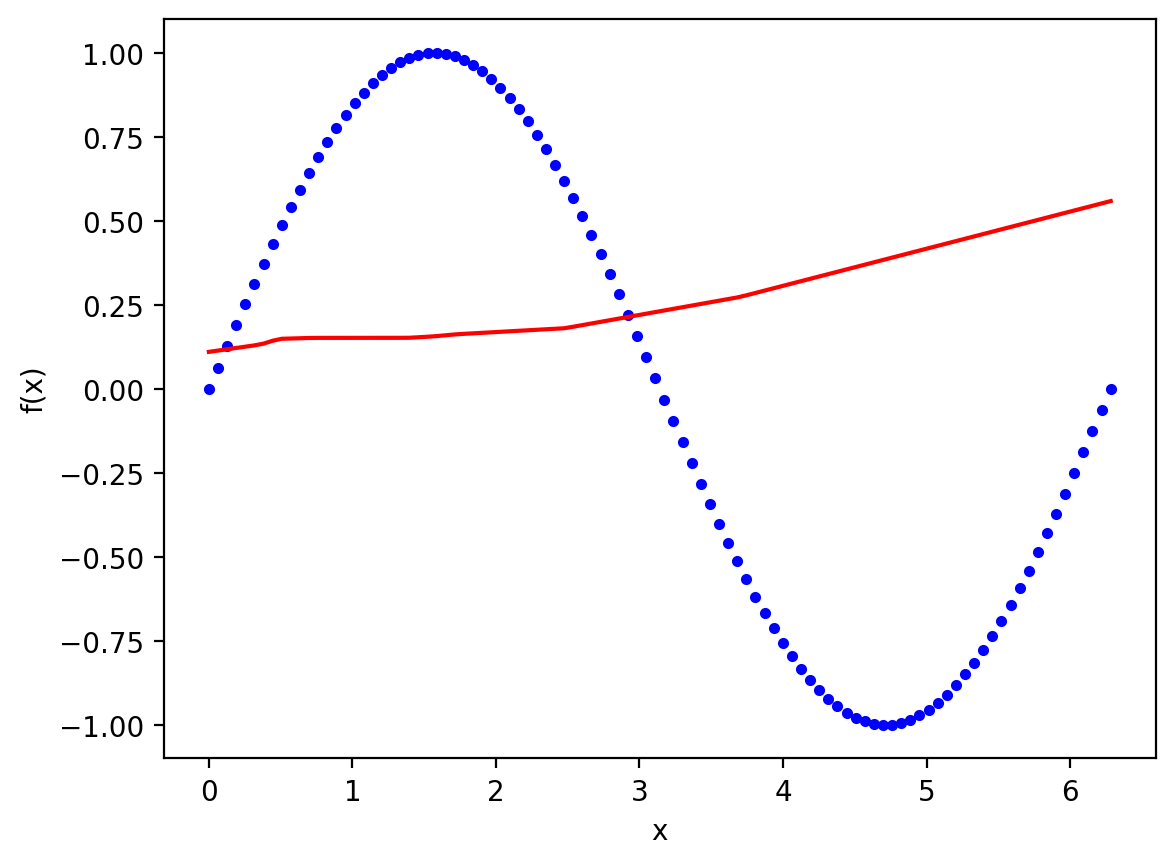

In [6]:
plt.plot(x.numpy(), y.numpy(), 'b.')
plt.plot(x.numpy(), yp.detach().numpy(), 'r')
plt.xlabel('x')
plt.ylabel('f(x)');

In [7]:
model.fc3.weight

Parameter containing:
tensor([[ 0.0741,  0.2047, -0.3293,  0.3487,  0.1750,  0.0491,  0.2835,  0.2774]],
       requires_grad=True)

In [8]:
model.fc3.bias

Parameter containing:
tensor([0.1231], requires_grad=True)

In [9]:
model.fc3.bias.data

tensor([0.1231])

In [10]:
for p in model.parameters():
    print(p.shape)

torch.Size([8, 1])
torch.Size([8])
torch.Size([8, 8])
torch.Size([8])
torch.Size([1, 8])
torch.Size([1])


## Optimize the model parameters so that the model predicts our function f(x)

In [11]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
loss_history = []

In [12]:
for i in range(10):
    opt.zero_grad()
    yp = model(x.reshape(100,1))
    loss = torch.nn.MSELoss()(yp, y.reshape(100,1))
    loss_history.append(loss.item())
    loss.backward()
    opt.step()

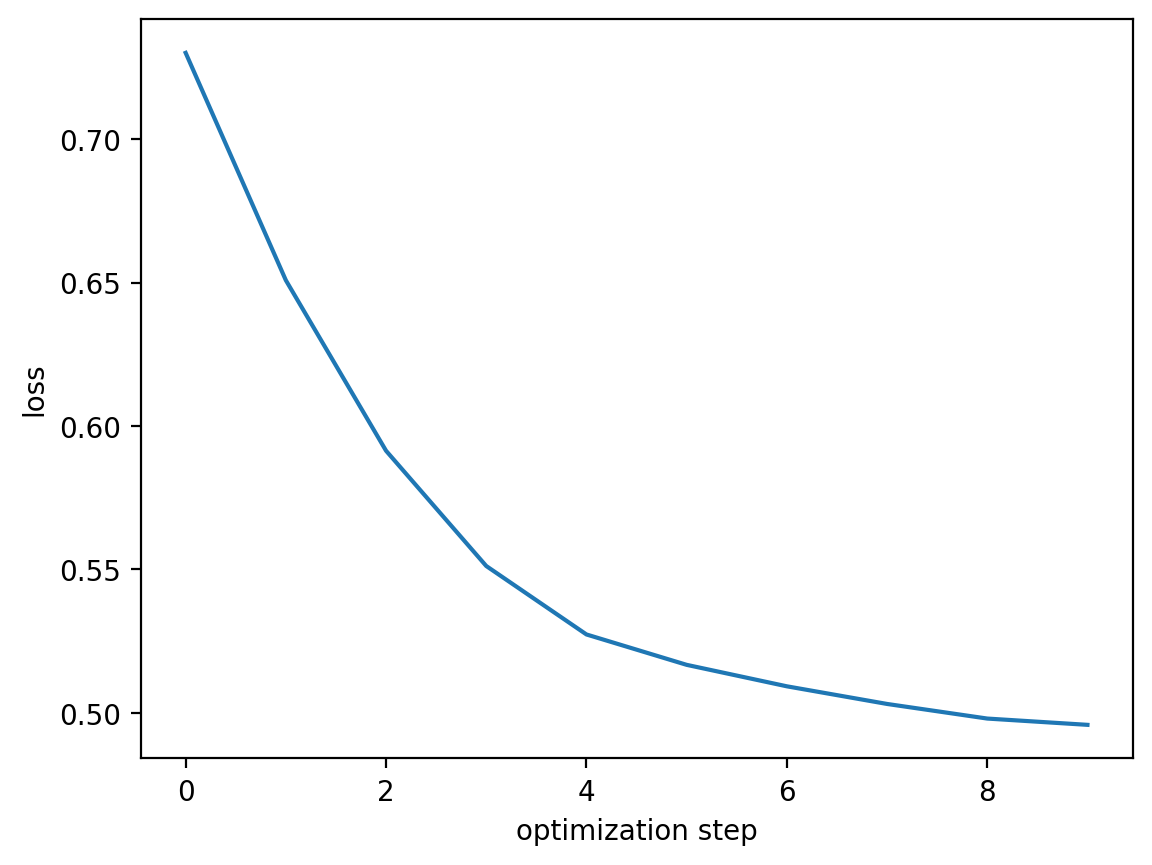

In [13]:
plt.plot(loss_history)
plt.xlabel('optimization step')
plt.ylabel('loss');

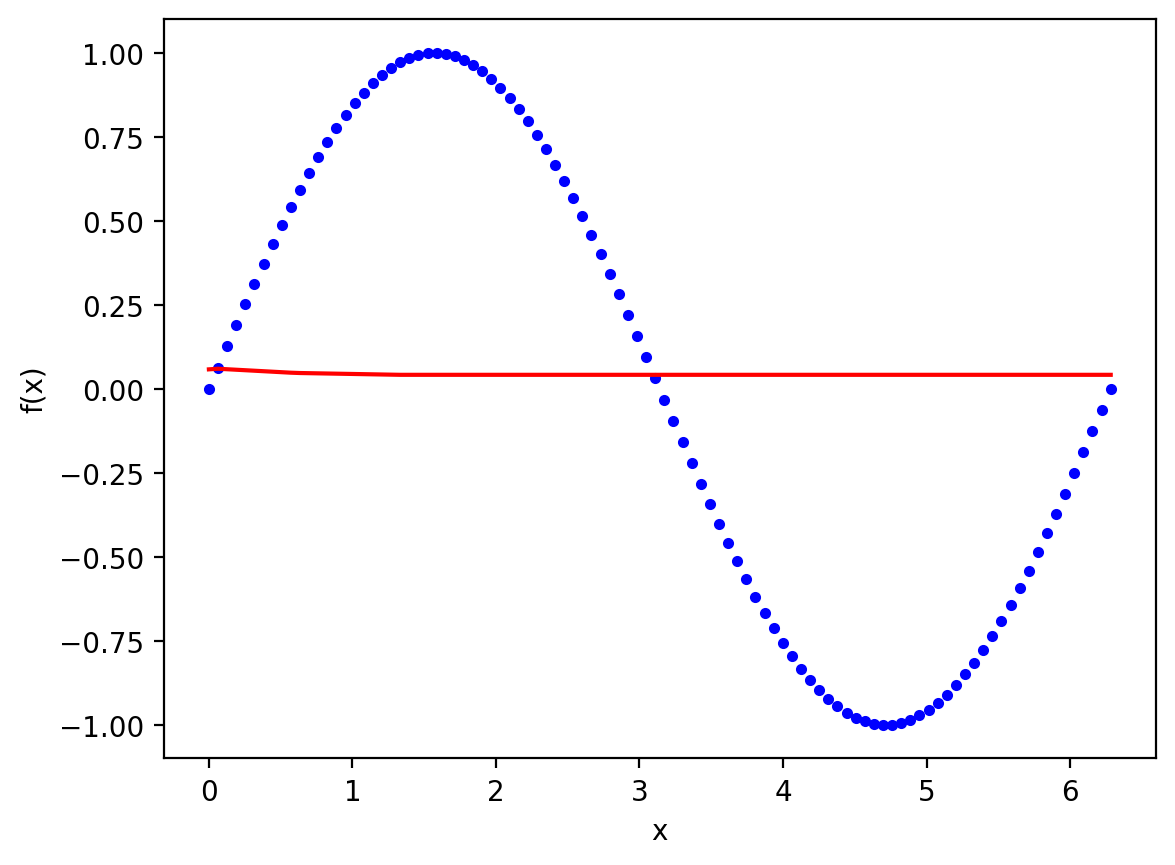

In [14]:
plt.plot(x.numpy(), y.numpy(), 'b.')
plt.plot(x.numpy(), yp.detach().numpy(), 'r')
plt.xlabel('x')
plt.ylabel('f(x)');

## Tasks

1. How many optimization steps are needed to get a reasonable approximation of our training data?

2. Can you adjust the learning rate or other parameters to speed up the optimization?

# Saving and restoring models

Save and load the parameters, not the full models.

In [15]:
torch.save(model.state_dict(), 'model_file.pkl')

In [16]:
model = MyModel()
model.load_state_dict(torch.load('model_file.pkl'))

<All keys matched successfully>

In [17]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.9303],
                      [-0.2091],
                      [-0.4556],
                      [ 0.4468],
                      [ 0.5666],
                      [-0.8417],
                      [ 0.5765],
                      [-0.4708]])),
             ('fc1.bias',
              tensor([-0.6487, -0.3078,  0.9692, -0.9463,  1.0209,  0.4924, -0.9732,  0.2996])),
             ('fc2.weight',
              tensor([[-0.2504, -0.1495, -0.0896, -0.3456,  0.1340,  0.2421, -0.3156,  0.1573],
                      [ 0.0945, -0.0925, -0.1658,  0.1399, -0.2267, -0.0795,  0.1892,  0.0959],
                      [ 0.2927, -0.3293,  0.0872,  0.0384, -0.2588,  0.2152, -0.0716, -0.1329],
                      [-0.1772, -0.1099, -0.1718,  0.2204, -0.0541,  0.0670, -0.1014,  0.3254],
                      [ 0.2547,  0.3394,  0.2600, -0.2653,  0.0590,  0.0083,  0.1156,  0.3399],
                      [ 0.0452, -0.2956,  0.0090, -0.3212, -0.3381,  0.043

# Visualizing run-time output with wandb

https://docs.wandb.ai/quickstart

In [18]:
import wandb

In [19]:
wandb.init(project='test',
           config={'epochs': 100})
for i in range(100):
    loss = np.exp(-i/50)
    wandb.log({"loss": loss})

wandb: Currently logged in as: lukeo (598sml). Use `wandb login --relogin` to force relogin
